## El exponente de Lyapunov
Adaptado de $SystemSciences$ (<a href="http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html#&ui-state=dialog">Fuente</a>)

El exponente de Lyapunov es el promedio del tiempo de $\log{|f^\prime(x_i)|}$ en cada estado en que el sistema pasa por el curso de la simulación. 

En este ejemplo, se computa el exponente de Lyapunov para el sistema discreto $x_{t+1}=x_t+r-x_t^2$ con una $r$ variable:

C:\Users\PERSONAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'x(t+1) = x(t) + r - x(t)^2 vs. exponente de Lyapunov')

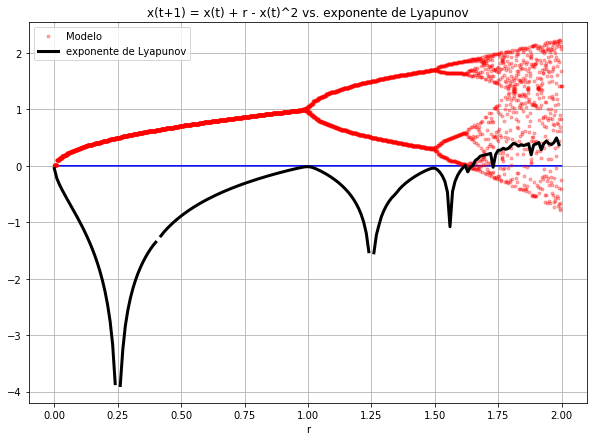

In [4]:
import numpy as np
import matplotlib.pyplot as plt

result = []
lambdas = []
maps = []

rvalues = np.arange(0, 2, 0.01) #define el rango de r

#itera en r
for r in rvalues:
    x = 0.1
    result = []
    #hace 100 iteraciones del sistema
    for t in range(100):
        x = x + r - x**2

        #calcula log del valor absoluto de la derivada
        result.append(np.log(abs(1 - 2*x)))
        
    #calcula el promedio
    lambdas.append(np.mean(result))

    for t in range(20):
        x = x + r - x**2
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(0, 2, 4000)

#linea del cero
zero = [0]*4000
ax1.plot(xticks, zero, 'b-')

#diagrama de bifurcaciones
ax1.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Modelo')
ax1.set_xlabel('r')

#exponente de Lyapunov
ax1.plot(rvalues, lambdas, 'k', linewidth = 3, label = 'exponente de Lyapunov')
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('x(t+1) = x(t) + r - x(t)^2 vs. exponente de Lyapunov')

Se puede ver que cada bifurcatión (diagrama rojo) ocurre cuando el exponente de Lyapunov se aproxima a $0$. El comienzo del caos determinístico (cuando divergen radicalmente las dos condiciones iniciales que en un principio eran muy cercanas) ocurre al exponente de Lyapunov (línea negra) tomar un valor positivo, cruzando la línea del $0$.

Los puntos en los que el exponente de Lyapunov toma valores negativos muy lejanos de $0$ (incluso infinitos) indican puntos de equilibio muy estables en el sistema con $f^\prime(x_t)\approx0$ para algunos valores de $t$

### Mapeo logístico

El siguiente ejemplo muestra la misma simulación para la ecuación $x_{t+1}=r*x_t*(1-x_t)$

C:\Users\PERSONAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Mapeo logístico vs. exponente de Lyapunov')

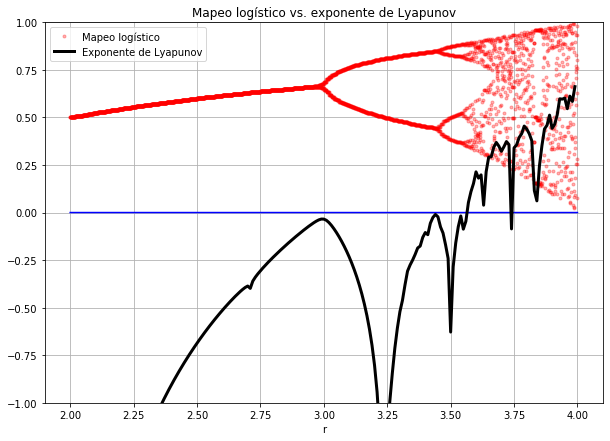

In [5]:
#Mapa logístico vs. exponente de Lyapunov

result = []
lambdas = []
maps = []
xmin = 2
xmax = 4
mult = (xmax - xmin)*2000

rvalues = np.arange(xmin, xmax, 0.01)

for r in rvalues:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))

    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)

zero = [0]*mult
ax1.plot(xticks, zero, 'b-')
ax1.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Mapeo logístico')
ax1.set_xlabel('r')
ax1.plot(rvalues, lambdas, 'k', linewidth = 3, label = 'Exponente de Lyapunov')
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Mapeo logístico vs. exponente de Lyapunov')

### Mapeo cúbico (the cubic map)


$$x_{t+1}=x_t^3-r*x_t$$



C:\Users\PERSONAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Mapeo cúbico vs. exponente de Lyapunov')

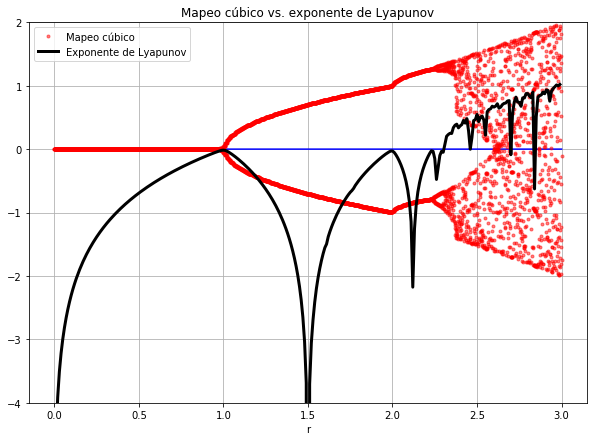

In [6]:
result = []
lambdas = []
maps = []
xmin = 0
xmax = 3
mult = (xmax - xmin)*2000

rvalues = np.arange(xmin, xmax, 0.01)

for r in rvalues:
    x = 0.1
    result = []
    for t in range(100):
        x = x**3 - r * x
        result.append(np.log(abs(3*x**2 - r)))
    lambdas.append(np.mean(result))

    for t in range(20):
        x = x**3 - r * x
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)

zero = [0]*mult
ax1.plot(xticks, zero, 'b-')
ax1.plot(xticks, maps, 'r.',alpha = 0.5, label = 'Mapeo cúbico')
ax1.set_xlabel('r')
ax1.plot(rvalues, lambdas, 'k', linewidth = 3, label = 'Exponente de Lyapunov')
ax1.set_ylim(-4, 2)
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Mapeo cúbico vs. exponente de Lyapunov')

### The sinusoid map

$$x_{t+1}=r*sinx_t$$


Text(0.5, 1.0, 'Sinusoid map versus Lyapunov exponent')

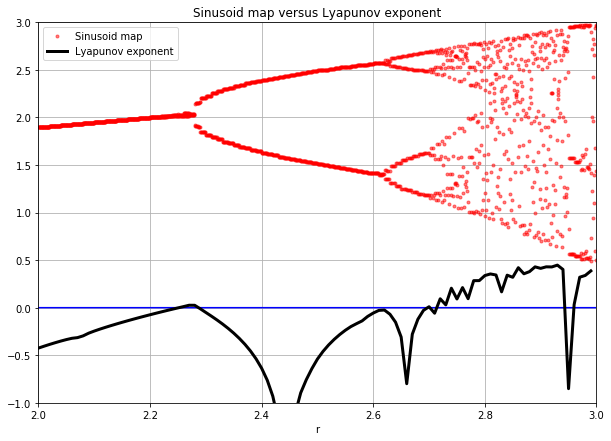

In [7]:
result = []
lambdas = []
maps = []
xmin = 2
xmax = 3
mult = (xmax - xmin)*2000

rvalues = np.arange(xmin, xmax, 0.01)

for r in rvalues:
    x = 0.1
    result = []
    for t in range(100):
        x = r * np.sin(x)
        result.append(np.log(abs(r*np.cos(x))))
    lambdas.append(np.mean(result))

    for t in range(20):
        x =  r * np.sin(x)
        maps.append(x)    
    
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)

zero = [0]*mult
ax1.plot(xticks, zero, 'b-')
ax1.plot(xticks, maps, 'r.', alpha = 0.5, label = 'Sinusoid map')
ax1.set_xlabel('r')
ax1.plot(rvalues, lambdas, 'k', linewidth = 3, label = 'Lyapunov exponent')
ax1.set_xlim(2, 3)
ax1.set_ylim(-1, 3)
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Sinusoid map versus Lyapunov exponent')